Jan Carlo L. Lima  
## AP155 Long Exam 4

### Item 1. Rolling biased dice (9 pts)

In [1]:
from random import randrange
N = 1000000
count = 0
for i in range(N):
    d1 = randrange(1,8)
    d2 = randrange(1,8)
    if d1 == 7:
        d1 == 3
    if d2 == 7:
        d2 == 3
    if d1==6 and d2==6:
        count += 1    
print("Double six fraction = ", count/N)

Double six fraction =  0.020486


which is close to the correct value of 1/49 = 0.02040816326530612. On other runs it will probably produce a different number, since the program is random

### Item 2: Volume of a hypersphere (11 pts)

In an arbitrary number of dimensions $d$, with $N$ points indexed by $i = 1, ..., N$ and $d$-dimensional coordinates ${\bf{r}}_i = (x_1^{(i)}, ..., x_d^{(i)})$, the function $f(x)$ generalizes to $f({\bf{r}}_i) = 1$ if $|{\bf{r}}_i|^2 \leq 1$, and 0 otherwise. Then the integral is given approximately by
\begin{equation}
I \approx \frac{2^d}{N}\sum_{i=1}^{N}f({\bf{r}}_i).
\end{equation}


In [2]:
from numpy import empty, dot
from numpy.random import random
d = 10
N = 1000000

#Integrand function
def f(r):
    if dot(r,r)<=1:
        return 1
    else:
        return 0

s = 0.
for i in range(N):
    #Generate a random point
    r = 2*random(d) - 1
    s += f(r)
    
print("I = ",(2**d)*s/N)

I =  2.577408


This is not too far off from the correct value of $\pi^5/5! = 2.55016$.

### Item 3. The Ising model (14 pts)

In [3]:
%matplotlib inline
from numpy import empty, sum, copy, exp
from numpy.random import random
from random import randrange
from matplotlib.pyplot import plot, xlabel, ylabel, imshow

Text(0, 0.5, 'Magnetization')

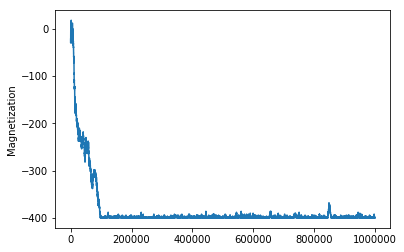

In [4]:
L = 20
N = 1000000
J = 1.0
T = 1.0
spin1_density = 0.5

#Initial state
s = random([L,L]) < spin1_density
s = 2*s - 1
M = sum(s)

def energy(s):
    return -J*(sum(s[0:L-1,:]*s[1:L,:]) + sum(s[:,0:L-1]*s[:,1:L]))

E = energy(s)
mpoints = []
#Main Monte Carlo loop
for k in range(N):
    mpoints.append(M)
    #Save the current energy
    oldE = E
    #Choose a spin, flip it, and calculate the change in energy
    i = randrange(L)
    j = randrange(L)
    s[i,j] = -s[i,j]
    E = energy(s)
    deltaE = E - oldE
    
    #Decide whether to accept the move using the Metropolis formula
    if deltaE > 0.:
        if random() > exp(-deltaE/T):
            #Move rejected. Revert to old state
            s[i,j] = -s[i,j]
            E = oldE
            #continue
    #Accepted, so calculate new magnetization
    M = sum(s)
    
plot(mpoints)
ylabel('Magnetization')

The magnetization starts close to zero, but rises to +400, which is the maximum value it can have, quite quickly. The system has become 'spontaneously magnetized.' If we run the program repeatedly, it will do the same thing every time, although sometimes it will magnetize positively and sometimes negatively. This is because the system is up-down symmetric, both directions being equivalent. In order to develop a nonzero magnetization, the system has to go one way or the other. Which way it goes depends on the details of the random fluctuations and cannot be predicted ahead of time. The same behavior, known as 'symmetry breaking' is also observed in real magnets.

NOTE: A better (and more correct) way to implement this program is to avoid calculating the energy altogether, but instead calculate just the change in energy -- a calculation confined to the spin that was flipped and its neighbors.

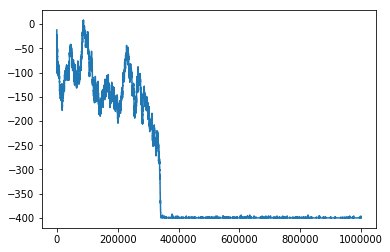

In [5]:
L = 20
N = 1000000
J = 1.0
T = 1.0
spin1_density = 0.5

#Initial state
s = random([L,L]) < spin1_density
s = 2*s - 1
M = sum(s)
mvrej =0 

def delta_energy_if_flipped(s, i, j, L):
    E_local = -J*s[i,j]*(s[i,(j+1)%L]+s[i,(j-1)%L]+s[(i-1)%L,j]+s[(i+1)%L,j])
    E_local_new = -E_local #since s[i,j] sign flips
    deltaE = E_local_new - E_local
    return deltaE

mpoints = []
#Main Monte Carlo loop
for k in range(N):
    mpoints.append(M)
    #Choose a spin, calculate the change in energy if flipped
    i = randrange(L)
    j = randrange(L)
    old_s = s[i,j]
    deltaE = delta_energy_if_flipped(s, i, j, L)
    s[i,j] = -s[i,j]
    #Decide whether to accept the move using the Metropolis formula
    if deltaE > 0.:
        if random() > exp(-deltaE/T):
            #Move rejected. Revert to old state
            s[i,j] = -s[i,j]
    #Accepted, so calculate new magnetization
    M = sum(s)
    
plot(mpoints)

### Item 4. Diffusion-limited aggregation (16 pts)

In [6]:
%matplotlib inline
from numpy import zeros, sin
from numpy.random import random
from matplotlib.pyplot import imshow, figure, axis, colorbar

In [7]:
def can_anchor(anchored,x,y):
    if x==0 or y==0 or x==L or y==L: #hit a wall
        return True
    elif anchored[x-1,y]>0 or anchored[x+1,y]>0 or anchored[x,y-1]>0 or anchored[x,y+1]>0:
        return True
    else:
        return False

In [8]:
def random_walk(x,y):
    if random() < 0.5: 
        if random() < 0.5:
            x += 1
        else:
            x -= 1
    else:
        if random() < 0.5:
            y += 1
        else:
            y -= 1
    return [x,y]

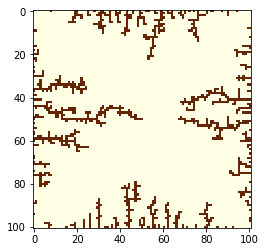

In [9]:
#Constants
L = 100
#Set up an array to store the anchored particles
anchored = zeros([L+1, L+1], bool)
while anchored[L//2, L//2] == False:
    #start a new particle at the center
    x = y = L//2
    while not can_anchor(anchored,x,y):
        [x,y] = random_walk(x,y)
    anchored[x,y] = True
ax = figure()
imshow(anchored, cmap='YlOrBr')

We can also make the colorized version that shows the age of the anchored particle.

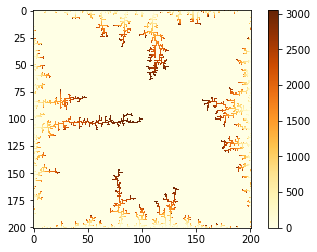

In [10]:
#Constants
L = 200
#Set up an array to store the anchored particles
anchored = zeros([L+1, L+1], int)
age = 0
while anchored[L//2, L//2] == 0:
    #start a new particle at the center
    x = y = L//2
    while not can_anchor(anchored,x,y):
        [x,y] = random_walk(x,y)
    age += 1
    anchored[x,y] = age
ax = figure()
imshow(anchored, cmap='YlOrBr')
colorbar()

Finally, we can make the version which starts at the center.

In [11]:
from numpy.random import random
from numpy import cos, sin, pi, sqrt, ceil

In [12]:
def new_particle(start_r, L):
    theta = 2*pi*random()
    xc = start_r*cos(theta)
    yc = sqrt(start_r**2 - xc**2)
    if random()<0.5:
        yc = -yc
    x = int(ceil(xc)+L//2)
    y = int(ceil(yc)+L//2)
    return [x,y]

In [13]:
def is_center_anchored(anchored, x, y):
    if anchored[x-1,y]>0 or anchored[x+1,y]>0 or anchored[x,y-1]>0 or anchored[x,y+1]>0:
        return True
    else:
        return False

In [14]:
def is_too_far(x, y, rfar, L):
    if (x-L//2)**2+(y-L//2)**2 > rfar**2:
        return True
    else:
        return False

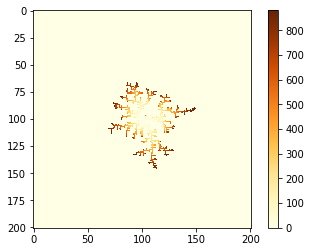

In [15]:
L = 200
anchored = zeros([L+1, L+1], int)

age = 1
r = 0
anchored[L//2, L//2] = age
rstop = L//4
rfar = 2

while r < rstop:
    rstart = r+1
    [x,y] = new_particle(rstart, L)
    while not is_center_anchored(anchored, x, y):
        [x,y] = random_walk(x,y)
        if is_too_far(x,y,rfar,L):
            [x,y] = new_particle(rstart, L)
    age += 1
    anchored[x,y] = age
    rcurrent = sqrt((x-L//2)**2 + (y-L//2)**2)
    if rcurrent > r:
        r = rcurrent
        rstart = r+1
        rfar = 2*r
    
ax = figure()
imshow(anchored, cmap='YlOrBr')
colorbar()